In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Base:
    def __init__(self):
        self.url = "https://thevirustracker.com/free-api"

In [3]:
class CountryTotal(Base):
    def __init__(self, country_code):
        super().__init__()
        self.params = {"countryTotal": country_code}
    
    def _get_data(self):
        return requests.get(self.url, self.params).json()
    
    def totals(self):
        data = self._get_data()
        print(f'Country: {data["countrydata"][0]["info"]["title"]}')
        for k, v in data["countrydata"][0].items():
            if k[0:5] == "total":
                print(f"{k:>25}: {v}")
    
    @property
    def cases(self):
        return self._get_data()["countrydata"][0]["total_cases"]
    
    @property
    def active(self):
        return self._get_data()["countrydata"][0]["total_active_cases"]
    
    @property
    def json(self):
        return self._get_data()

In [4]:
class CountryTimeline(Base):
    def __init__(self, country_code):
        super().__init__()
        self.params = {"countryTimeline": country_code}
        
    def _get_data(self):
        return requests.get(self.url, self.params).json()
    
    @property
    def data_frame(self):
        timeline = self._get_data()["timelineitems"][0]
        total_cases = [v['total_cases'] for k, v in timeline.items() if k!="stat"]
        new_daily_cases = [v['new_daily_cases'] for k, v in timeline.items() if k!="stat"]
        new_daily_deaths = [v['new_daily_deaths'] for k, v in timeline.items() if k!="stat"]
        total_recoveries = [v['total_recoveries'] for k, v in timeline.items() if k!="stat"]
        total_deaths = [v['total_deaths'] for k, v in timeline.items() if k!="stat"]
        dates = [k for k, v in timeline.items() if k!="stat"]
        return pd.DataFrame({
            "Date": dates, 
            "Total Cases": total_cases, 
            "New Daily Cases": new_daily_cases, 
            "New Daily Deaths": new_daily_deaths,
            "Total Recoveries": total_recoveries,
            "Total Deaths": total_deaths
        })
    
    @property
    def json(self):
        return self._get_data()

In [5]:
de = CountryTimeline("DE")
us = CountryTimeline("US")
it = CountryTimeline("IT")

In [13]:
try:
    de_data = de.data_frame
    us_data = us.data_frame
    it_data = it.data_frame
except Exception as e:
    print(e)

In [14]:
de_data.loc[:,:]

,Date,Total Cases,New Daily Cases,New Daily Deaths,Total Recoveries,Total Deaths
0,1/23/2020,0,0,0,0,0
1,1/24/2020,0,0,0,0,0
2,1/25/2020,0,0,0,0,0
3,1/26/2020,0,0,0,0,0
4,1/27/2020,1,1,0,0,0
5,1/28/2020,4,3,0,0,0
6,1/29/2020,4,0,0,0,0
7,1/30/2020,4,0,0,0,0
8,1/31/2020,5,1,0,0,0
9,2/1/2020,8,3,0,0,0


In [18]:
it_data.loc[:,:]

,Date,Total Cases,New Daily Cases,New Daily Deaths,Total Recoveries,Total Deaths
0,1/23/2020,0,0,0,0,0
1,1/24/2020,0,0,0,0,0
2,1/25/2020,0,0,0,0,0
3,1/26/2020,0,0,0,0,0
4,1/27/2020,0,0,0,0,0
5,1/28/2020,0,0,0,0,0
6,1/29/2020,0,0,0,0,0
7,1/30/2020,0,0,0,0,0
8,1/31/2020,2,2,0,0,0
9,2/1/2020,2,0,0,0,0


In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

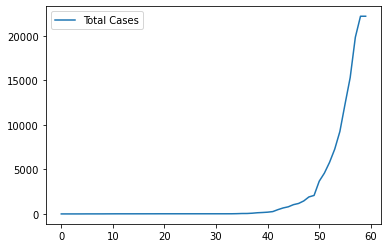

In [16]:
de_data.loc[:,["Total Cases"]].plot()